In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches
from scipy.io import loadmat
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.text import Text

In [2]:
path = os.path.abspath('../..')

colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

### ML Predicted Result for Laser Heat Conduction Simulation without PF

In [12]:
X_T = np.load(path+'/1_Simulation_Results/ML_numpy_files/quant_data/temp_only/X.npy')
LIQ_pred_T = np.load(path+'/6_Machine_Learning/quantification/predicted_results/temp_only/LIQ_pred_T.npy')
time_T = np.load(path+'/1_Simulation_Results/ML_numpy_files/quant_data/temp_only/time.npy')
LIQ_pred_T.shape, time_T.shape

((384, 1, 201, 401), (384,))

In [13]:
XT_reshaped = X_T[:, np.newaxis, :, :]  ## Adding Batch size of 1
XT_reshaped.shape

(384, 1, 201, 401)

### ML Predicted and FEM Generated Laser Heat Conduction Simulation WITH PF

In [7]:
X_PF = np.load(path+'/1_Simulation_Results/ML_numpy_files/quant_data/pf_temp/X.npy')
y_PF = np.load(path+'/1_Simulation_Results/ML_numpy_files/quant_data/pf_temp/y.npy')

LIQ_pred_PF = np.load(path+'/6_Machine_Learning/quantification/predicted_results/pf_temp/LIQ_pred_PFT.npy')
time_PF = np.load(path+'/1_Simulation_Results/ML_numpy_files/quant_data/pf_temp/time.npy')

In [10]:
XPF_reshaped = X_PF[:, np.newaxis, :, :]  ## Adding Batch size of 1
XPF_reshaped.shape

(384, 1, 201, 401)

In [8]:
pred_error_PFT = LIQ_pred_T - y_PF[:, np.newaxis, :, :]

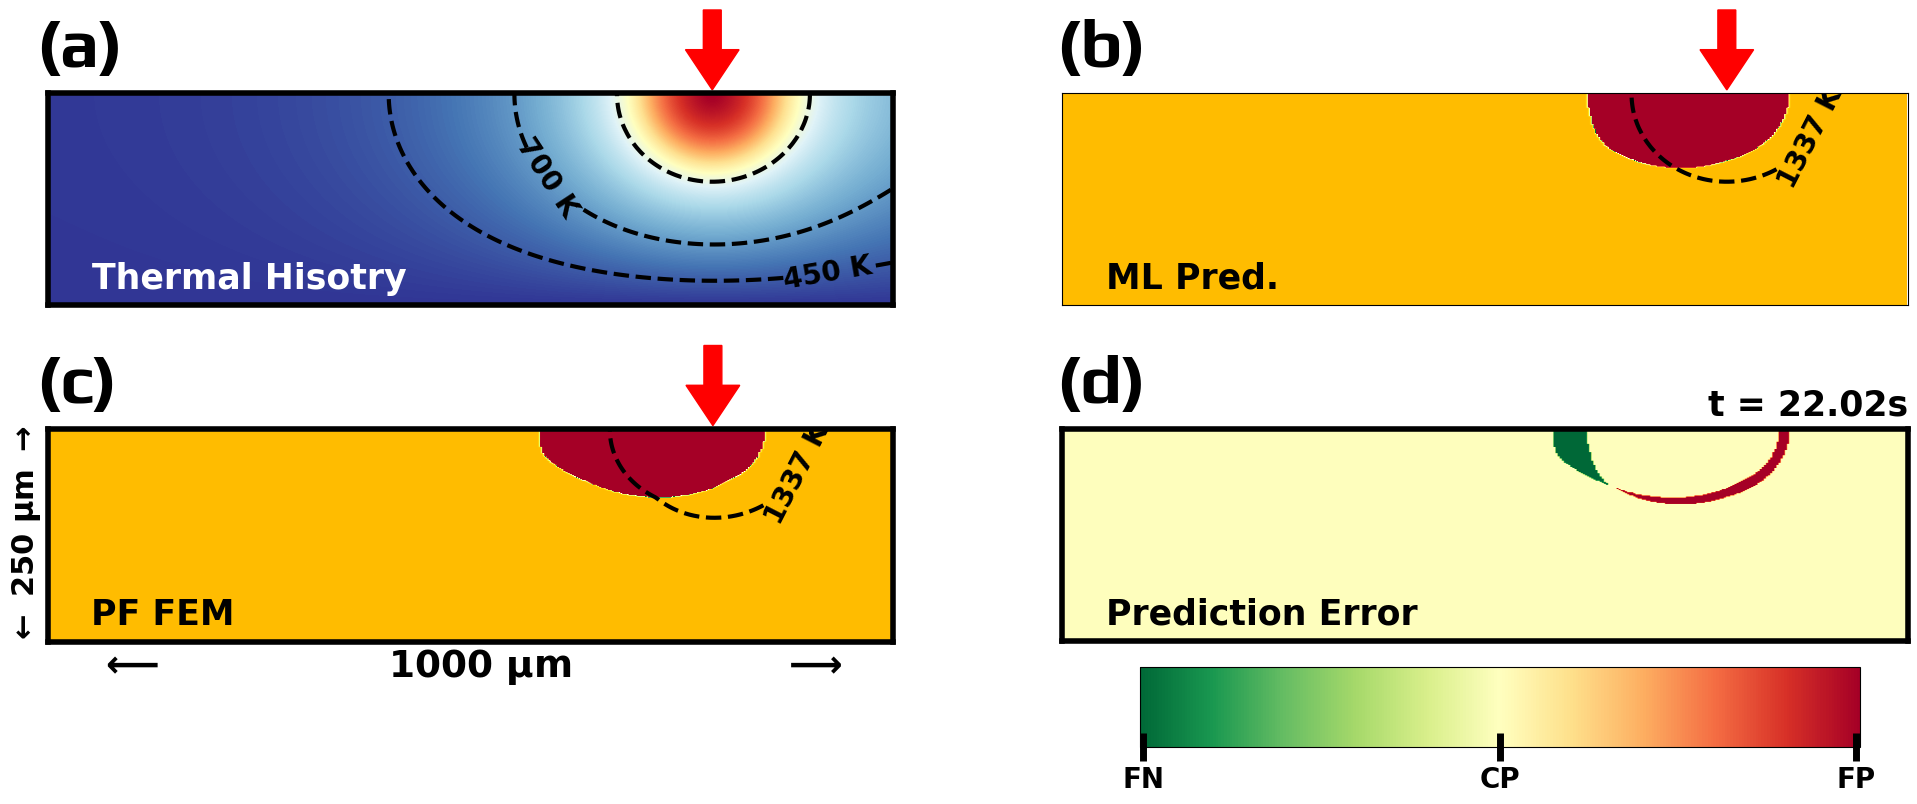

In [87]:
t_step = 350
laser_speed = 30
laser_pos = (125 + time_PF[t_step]*laser_speed)* 401/1000  # Laser actual position in true dimension

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 8))

cmap = plt.get_cmap('RdYlBu_r')
cmap.set_under('white', alpha=0)
hmap1 = ax1.imshow(XT_reshaped[t_step][0], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')
# ax1.set_title('Thermal Hisotry\n(Only T FEM)', pad=80, loc='right', fontsize=25, weight='bold')
ax1.text(20, 185, s = "Thermal Hisotry", fontsize=25, weight='bold', color='white')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
ax1.set_ylim(201, -1);  ax1.set_xlim(-1,401)
ax1.spines[:].set_linewidth(4)

contour_levels = [450, 700]
label_colors = ['k', 'k',]
contour = ax1.contour(XT_reshaped[t_step][0], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 
ax1.spines[:].set_linewidth(4)
ax1.contour(XT_reshaped[t_step][0], levels=[1337], colors='black', linewidths=3, linestyles='dashed')

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap2a = ax2.imshow(LIQ_pred_T[t_step][0], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5)
cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap2b = ax2.imshow(1-LIQ_pred_T[t_step][0], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
ax2.set_ylim(201, -1);  ax2.set_xlim(-1,401)
# ax2.set_title('Phase Evolution\n(ML Prediction)', pad=10, loc='right', fontsize=25, weight='bold')
ax2.text(20, 185, s = "ML Pred.", fontsize=25, weight='bold')
ax2.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
contour_levels = [1337]
label_colors = ['k', 'k',]
contour = ax2.contour(XT_reshaped[t_step][0], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 


cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap3a = ax3.imshow(y_PF[t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5)
cmap = plt.get_cmap('Wistia')
cmap.set_under('white', alpha=0) 
hmap3b = ax3.imshow(1-y_PF[t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
ax3.set_ylim(201, -1);  ax4.set_xlim(-1,401)
# ax3.set_title('Phase Evolution\n(PF FEM)', pad=10, loc='right', fontsize=25, weight='bold')
ax3.text(20, 185, s = "PF FEM", fontsize=25, weight='bold')
ax3.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
ax3.spines[:].set_linewidth(4)
contour_levels = [1337]
label_colors = ['k', 'k',]
contour = ax3.contour(XPF_reshaped[t_step][0], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 
ax3.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
ax3.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90, xycoords='axes fraction', textcoords='axes fraction', fontsize = 22, weight = 'bold', color='k', ha='center', va='center')

cmap = plt.get_cmap('RdYlGn_r')
cmap.set_under('white', alpha=0)
hmap3 = ax4.imshow(pred_error_PFT[t_step][0], cmap=cmap, vmin=-1, vmax=1, aspect=0.5)
# ax4.set_title('Prediction Error', pad=10, loc='right', fontsize=25, weight='bold')
ax4.text(20, 185, s = "Prediction Error", fontsize=25, weight='bold')
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5 = fig1.add_axes([0.58, 0.02, 0.3, 0.1])
cbar = fig1.colorbar(hmap3, cax=ax5, orientation='horizontal')
# ax5.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar.ax.tick_params(labelsize=20, direction='inout', length=20, width=5, rotation=0) 
cbar.set_ticks([-0.99,0,0.99], labels=['FN','CP','FP'], weight='bold')
ax4.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
ax4.set_ylim(201, -1);  ax4.set_xlim(-1,401)
ax4.spines[:].set_linewidth(4)

ax4.set_title(f't = {time_T[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')


text_a = Text(x=0.12, y=0.87, text=r'(a)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_b = Text(x=0.545, y=0.87, text=r'(b)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_c = Text(x=0.12, y=0.45, text=r'(c)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
text_d = Text(x=0.545, y=0.45, text=r'(d)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
fig1.add_artist(text_a)
fig1.add_artist(text_b)
fig1.add_artist(text_c)
fig1.add_artist(text_d)

plt.show()

In [93]:
def update_plot(t_step):
    laser_speed = 30
    laser_pos = (125 + time_PF[t_step]*laser_speed)* 401/1000  # Laser actual position in true dimension
    
    fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 8))
    
    cmap = plt.get_cmap('RdYlBu_r')
    cmap.set_under('white', alpha=0)
    hmap1 = ax1.imshow(XT_reshaped[t_step][0], cmap='RdYlBu_r', vmin=300, aspect=0.5,  interpolation='quadric')
    # ax1.set_title('Thermal Hisotry\n(Only T FEM)', pad=80, loc='right', fontsize=25, weight='bold')
    ax1.text(20, 185, s = "Thermal Hisotry", fontsize=25, weight='bold', color='white')
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
    ax1.set_ylim(201, -1);  ax1.set_xlim(-1,401)
    ax1.spines[:].set_linewidth(4)
    
    contour_levels = [450, 700]
    label_colors = ['k', 'k',]
    contour = ax1.contour(XT_reshaped[t_step][0], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
    labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
    for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 
    ax1.spines[:].set_linewidth(4)
    ax1.contour(XT_reshaped[t_step][0], levels=[1337], colors='black', linewidths=3, linestyles='dashed')
    
    cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_under('white', alpha=0)
    hmap2a = ax2.imshow(LIQ_pred_T[t_step][0], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5)
    cmap = plt.get_cmap('Wistia')
    cmap.set_under('white', alpha=0) 
    hmap2b = ax2.imshow(1-LIQ_pred_T[t_step][0], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
    ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax2.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
    ax2.set_ylim(201, -1);  ax2.set_xlim(-1,401)
    # ax2.set_title('Phase Evolution\n(ML Prediction)', pad=10, loc='right', fontsize=25, weight='bold')
    ax2.text(20, 185, s = "ML Pred.", fontsize=25, weight='bold')
    ax2.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
    contour_levels = [1337]
    label_colors = ['k', 'k',]
    contour = ax2.contour(XT_reshaped[t_step][0], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
    labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
    for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 
    
    
    cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_under('white', alpha=0)
    hmap3a = ax3.imshow(y_PF[t_step], cmap=cmap, vmin=0.5, vmax=1.0, aspect=0.5)
    cmap = plt.get_cmap('Wistia')
    cmap.set_under('white', alpha=0) 
    hmap3b = ax3.imshow(1-y_PF[t_step], cmap=cmap, vmin=0.5, vmax=1.5, aspect=0.5, interpolation='quadric')
    ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax3.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
    ax3.set_ylim(201, -1);  ax4.set_xlim(-1,401)
    # ax3.set_title('Phase Evolution\n(PF FEM)', pad=10, loc='right', fontsize=25, weight='bold')
    ax3.text(20, 185, s = "PF FEM", fontsize=25, weight='bold')
    ax3.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='red', length_includes_head=True, clip_on=False)
    ax3.spines[:].set_linewidth(4)
    contour_levels = [1337]
    label_colors = ['k', 'k',]
    contour = ax3.contour(XPF_reshaped[t_step][0], levels=contour_levels, colors='black', linewidths=3, linestyles='dashed')
    labels = plt.clabel(contour, inline=True, fontsize=20, fmt='%1.0f K')
    for label, color in zip(labels, label_colors): label.set_fontweight('bold');label.set_color(color) 
    ax3.set_xlabel('$\mathbf{\longleftarrow}$                 1000 $ \mathbf{\mu m}$                $\mathbf{\longrightarrow}$', fontsize = 27, weight ='bold',)
    ax3.annotate(r'$\mathbf{\leftarrow}$ 250 $\mathbf{\mu m}$ $\mathbf{\rightarrow}$', xy=(0.5, 0.5), xytext=(-0.025, 0.5), rotation=90, xycoords='axes fraction', textcoords='axes fraction', fontsize = 22, weight = 'bold', color='k', ha='center', va='center')
    
    cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_under('white', alpha=0)
    hmap3 = ax4.imshow(pred_error_PFT[t_step][0], cmap=cmap, vmin=-1, vmax=1, aspect=0.5)
    # ax4.set_title('Prediction Error', pad=10, loc='right', fontsize=25, weight='bold')
    ax4.text(20, 185, s = "Prediction Error", fontsize=25, weight='bold')
    ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax5 = fig1.add_axes([0.58, 0.02, 0.3, 0.1])
    cbar = fig1.colorbar(hmap3, cax=ax5, orientation='horizontal')
    # ax5.tick_params(axis='both', labelcolor='black', labelsize=1, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    cbar.ax.tick_params(labelsize=20, direction='inout', length=20, width=5, rotation=0) 
    cbar.set_ticks([-0.99,0,0.99], labels=['FN','CP','FP'], weight='bold')
    ax4.arrow(laser_pos, -80, 0, 76,  width = 8.5, color='none', length_includes_head=True, clip_on=False)
    ax4.set_ylim(201, -1);  ax4.set_xlim(-1,401)
    ax4.spines[:].set_linewidth(4)
    
    ax4.set_title(f't = {time_T[t_step]:.2f}s', pad=10, loc='right', fontsize=25, weight='bold')
    
    
    text_a = Text(x=0.12, y=0.87, text=r'(a)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
    text_b = Text(x=0.545, y=0.87, text=r'(b)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
    text_c = Text(x=0.12, y=0.45, text=r'(c)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
    text_d = Text(x=0.545, y=0.45, text=r'(d)', fontsize=50, color='k', rotation=0, weight='bold', fontname='Play')
    fig1.add_artist(text_a)
    fig1.add_artist(text_b)
    fig1.add_artist(text_c)
    fig1.add_artist(text_d)
    
t_steps = 384
############ To save the image as well #############
for t_step in range(350, 384, 1):
# for t_step in range(t_steps):
    update_plot(t_step)
    plt.savefig(f'../temperoray_figures/ML_pred/f_{t_step}.png',bbox_inches='tight', dpi=100)
    plt.close() 
print("FINISHED")

FINISHED
